In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv


In [2]:
df1=pd.read_csv('/kaggle/input/walmart-data-analysis-and-forcasting/Walmart Data Analysis and Forcasting.csv')
df1.head()

#df1.Weekly_Sales.astype(float)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


> # QUESTION WE WILL TO SOLVE?
    * Which stores are high and low performing stores?
    * Is there a difference in total sales of the stores during an holiday and a non-holiday week? Is there is difference in means and if there is the difference statistically significant?
    * Is a correlation between weekly sales and other variables like(temperature, gas price, unemployment rate, CGI)?

# **DATA PREPROCESSING**

In [3]:
#Get the year from the Date
df1['Year'] = pd.DatetimeIndex(df1['Date']).year
df1['Month'] = pd.DatetimeIndex(df1['Date']).month

/tmp/ipykernel_21/1987421466.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Year'] = pd.DatetimeIndex(df1['Date']).year
/tmp/ipykernel_21/1987421466.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Month'] = pd.DatetimeIndex(df1['Date']).month


# 1. Which stores are high and low performing stores?

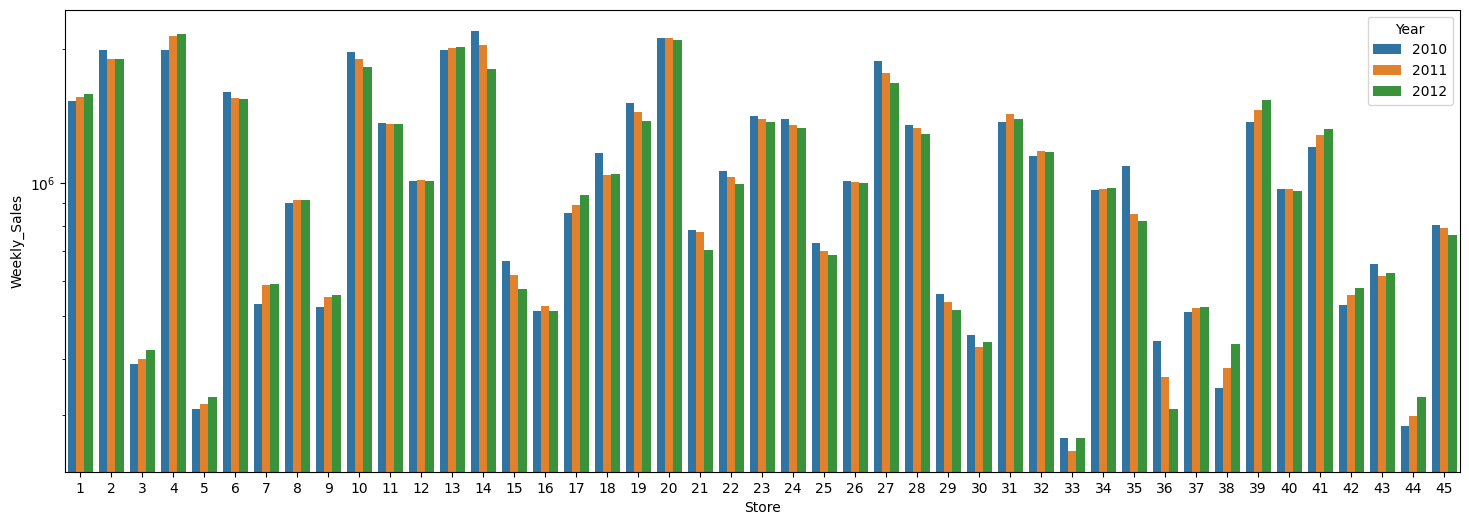

In [4]:
#Plotting the data to understand the distribution of sales by year
plt.figure(figsize = (18,6))
#ticks = [10000000, 40000000, 60000000, 80000000, 100000000 ]
ax = sns.barplot(x = df1.Store, y = df1.Weekly_Sales, hue = df1.Year, errorbar=None)
ax.set_yscale("log")


> **Low Sales:** From the above chart it is clear that 'store 33' is the lowest performing stores for all three years. 
                The store has lowest sales for all the three years. This store can act as an clearance store. 

> **High Sales:** Store 20 is the only store that has maintained its sales for the all the three years. 

    Let's verify this data

In [5]:
group2010 = df1[df1['Year'] == 2010]
max_weekly_sales2010 = group2010.groupby('Store')['Weekly_Sales'].sum().idxmax()
min_weekly_sales2010 = group2010.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Store with the highest weekly sales for 2010:", max_weekly_sales2010)
print("Store with the lowest weekly sales for 2010:", min_weekly_sales2010)


Store with the highest weekly sales for 2010: 14
Store with the lowest weekly sales for 2010: 33


In [6]:
group2011 = df1[df1['Year'] == 2011]
max_weekly_sales2011 = group2011.groupby('Store')['Weekly_Sales'].sum().idxmax()
min_weekly_sales2011 = group2011.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Store with the highest weekly sales for 2010:", max_weekly_sales2011)
print("Store with the lowest weekly sales for 2010:", min_weekly_sales2011)

Store with the highest weekly sales for 2010: 4
Store with the lowest weekly sales for 2010: 33


In [7]:
group2012 = df1[df1['Year'] == 2012]
max_weekly_sales2012 = group2012.groupby('Store')['Weekly_Sales'].sum().idxmax()
min_weekly_sales2012 = group2012.groupby('Store')['Weekly_Sales'].sum().idxmin()
print("Store with the highest weekly sales for 2010:", max_weekly_sales2012)
print("Store with the lowest weekly sales for 2010:", min_weekly_sales2012)

Store with the highest weekly sales for 2010: 4
Store with the lowest weekly sales for 2010: 33


# Is there a difference in total sales of the stores during an holiday and a non-holiday week? If there is is the difference statistically significant?

In [8]:
#Total yearly sales during holidays
isholiday2010 = df1.loc[(df1.Holiday_Flag == 1) & (df1.Year == 2010)]['Weekly_Sales'].sum().round(2)
isholiday2011 = df1.loc[(df1.Holiday_Flag == 1) & (df1.Year == 2011)]['Weekly_Sales'].sum()
isholiday2012 = df1.loc[(df1.Holiday_Flag == 1) & (df1.Year == 2012)]['Weekly_Sales'].sum()

#Total yearly sales during holidays
notholiday2010 = df1.loc[(df1.Holiday_Flag == 0) & (df1.Year == 2010)]['Weekly_Sales'].sum().round(2)
notholiday2011 = df1.loc[(df1.Holiday_Flag == 0) & (df1.Year == 2011)]['Weekly_Sales'].sum()
notholiday2012 = df1.loc[(df1.Holiday_Flag == 0) & (df1.Year == 2012)]['Weekly_Sales'].sum()

#print("Total 2010 sales during holiday weeks:",   isholiday2010)
#print("Total 2010 sales during non-holiday weeks:",notholiday2010)

#print("Total 2011 sales during holiday weeks:",    isholiday2011)
#print("Total 2011 sales during non-holiday weeks:",notholiday2011)

#print("Total 2012 sales during holiday weeks:",    isholiday2012)
#print("Total 2012 sales during non-holiday weeks:",notholiday2012)


In [9]:
#Average sales during holiday and non-holiday days. 
avg_holiday_sales = df1[df1['Holiday_Flag']==1]['Weekly_Sales'].mean()
avg_non_holiday_sales = df1[df1['Holiday_Flag']==0]['Weekly_Sales'].mean()

print("Avg sales during holiday season:    ",avg_holiday_sales)
print("Avg sales during non-holiday season:",avg_non_holiday_sales)

Avg sales during holiday season:     1122887.8923555557
Avg sales during non-holiday season: 1041256.3802088555


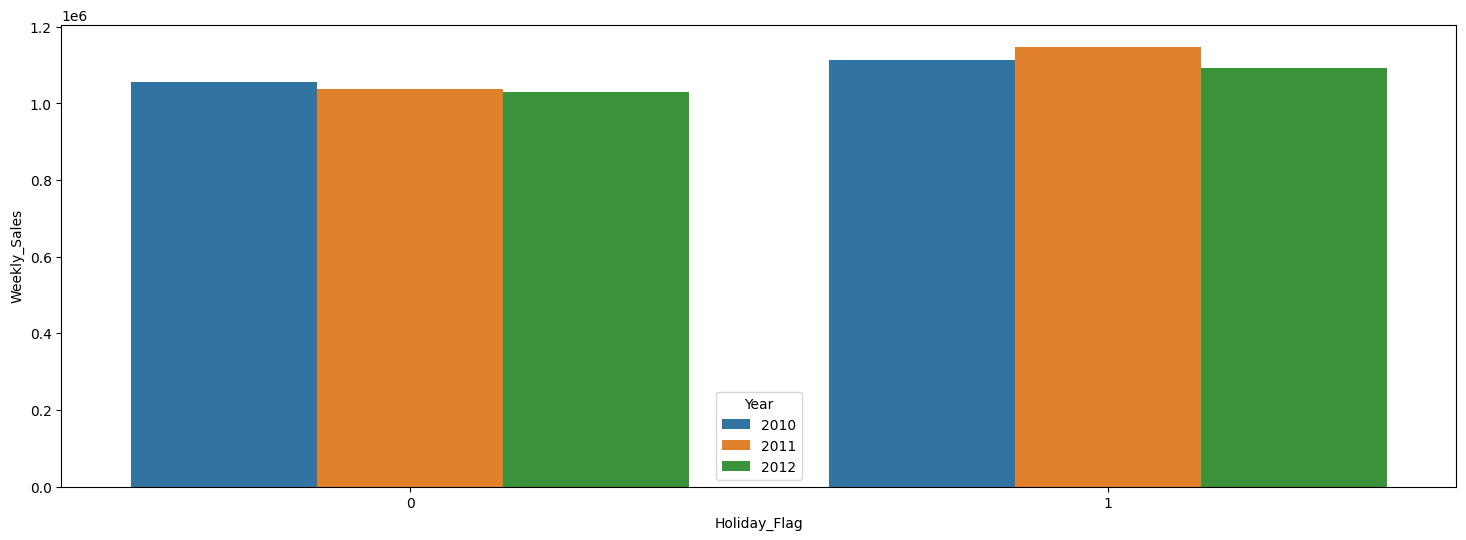

In [10]:
#Plot the sales by year for holiday and non-holiday.

plt.figure(figsize = (18,6))
ax = sns.barplot(x = df1.Holiday_Flag, y = df1.Weekly_Sales,hue = df1.Year, errorbar=None)

> From the above figure, It is clear that the sales were high during holidays when compared to non-holiday days. Let's check if the results from the above are statistically significant. We will apply the t-test statistical test that is used to compare the differences between two means.

    **Null Hypothesis**:There is no mean difference between the two groups in the population.
    **Alternate Hypothesis**:There is no mean difference between the two groups in the population.

> **Assumptions of T-test**:

     1. The independent variable is categorical with atleast group - Our Holiday_Flag has two groups.
     2. Dependent variable is continuous - Weekly_Sales is continuous.
     3. The distribution should follow a normal distribution
     4. The variances between the two groups are equal. 

In [11]:
df1.groupby("Holiday_Flag")['Weekly_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Holiday_Flag,,,,,,,,
0,5985.0,1.041256e+06,558957.436147,209986.25,551378.3900,956211.20,1414343.530,3818686.45
1,450.0,1.122888e+06,627684.931884,215359.21,575865.4825,1018538.04,1555213.175,3004702.33


> T test to understand if the difference in means is significant:

    Levene’s test is an equal variance test. It can be used to check if our data sets fulfill the homogeneity of variance assumption before we perform the t-test

    * H0: The null hypothesis formed in the Levene’s test is that the groups(Holiday sales vs non-holiday sales) we are comparing have equal variance.
    * H1: The groups do not have equal variances.

In [12]:
isholiday = df1[(df1.Holiday_Flag == 1)]['Weekly_Sales']
notholiday = df1[(df1.Holiday_Flag == 0)]['Weekly_Sales']


stats.levene(isholiday, notholiday)

#p values is less than 0.05, then there is a significant difference between the variances of weekly sales during holidays and non-holidays. 
#They have unequal variances. 
#the Student’s t-test is no longer robust when the data sets have unequal variances especially when they also have unequal sample sizes. 
#This is because the unequal variances can influence the Type 1 error rate by either increasing or decreasing the Type 1 error rate from α or the threshold level.

LeveneResult(statistic=10.519203649624915, pvalue=0.0011874337918717478)

In [13]:
#Assumption 2:
#Plot the data to check if the data follows a normal distribution
#isholiday.plot(kind="hist",title = "Holiday Sales")
#notholiday.plot(kind="hist",title = "NotHoliday Sales")

((array([-2.95981055e+00, -2.67505418e+00, -2.51472401e+00, -2.40093139e+00,
         -2.31169958e+00, -2.23778488e+00, -2.17438905e+00, -2.11868884e+00,
         -2.06887717e+00, -2.02372498e+00, -1.98235699e+00, -1.94412697e+00,
         -1.90854367e+00, -1.87522463e+00, -1.84386602e+00, -1.81422228e+00,
         -1.78609206e+00, -1.75930807e+00, -1.73372979e+00, -1.70923795e+00,
         -1.68573048e+00, -1.66311926e+00, -1.64132770e+00, -1.62028881e+00,
         -1.59994361e+00, -1.58023991e+00, -1.56113128e+00, -1.54257627e+00,
         -1.52453763e+00, -1.50698187e+00, -1.48987864e+00, -1.47320046e+00,
         -1.45692229e+00, -1.44102127e+00, -1.42547647e+00, -1.41026869e+00,
         -1.39538025e+00, -1.38079486e+00, -1.36649743e+00, -1.35247400e+00,
         -1.33871162e+00, -1.32519822e+00, -1.31192258e+00, -1.29887422e+00,
         -1.28604332e+00, -1.27342073e+00, -1.26099784e+00, -1.24876656e+00,
         -1.23671930e+00, -1.22484891e+00, -1.21314864e+00, -1.20161213e+00,

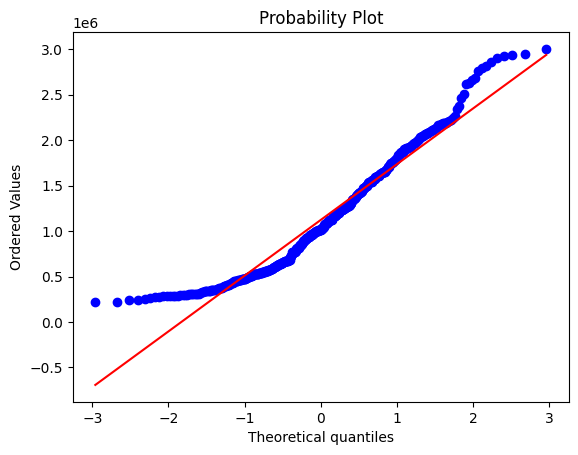

In [14]:
#Assumption 2:
# q-q plot, It is easier to get a sense of normality with this plot because the data should be on the red line. 
#If there are data points that are far off of it, it’s an indication that there are some deviations from normality.

stats.probplot(isholiday, dist = "norm", plot = plt)

((array([-3.68177617, -3.44922183, -3.32118749, ...,  3.32118749,
          3.44922183,  3.68177617]),
  array([ 209986.25,  213538.32,  220060.35, ..., 3749057.69, 3766687.43,
         3818686.45])),
 (544195.1567801365, 1041256.3802088554, 0.973118085316601))

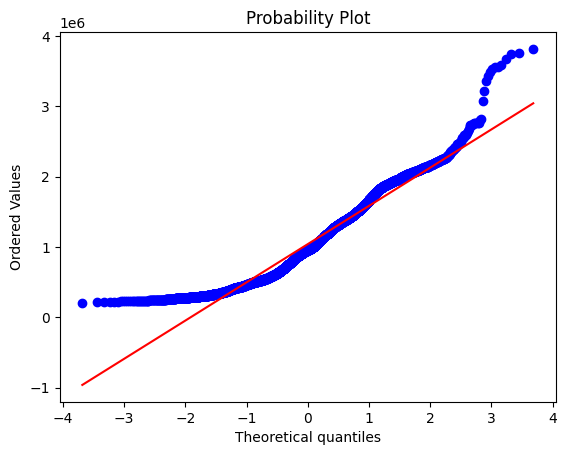

In [15]:
stats.probplot(notholiday, dist = "norm", plot = plt)

> **Both the graphs follows a normal distribution but to be sure, we can test it statistically using the Shapiro-Wilk test for normality which is the stats.shaprio() method.

In [16]:
#t test where the first parameter is t-test and the second is p-value. 
stats.ttest_ind(isholiday, notholiday)

Ttest_indResult(statistic=2.9608919093259036, pvalue=0.003078699263818616)

p <0.05, that the difference between the means in holiday and non-holiday weekly sales is statistically significant.

**FUTURE PROSPECTS AND MORE QUESTIONS TO SOLVE:**

A) Did all stores have high sales during a holiday? If there were then more resource allocation may be needed.

# Is a correlation between weekly sales and other variables like(temperature, gas price, unemployment rate, CGI)?

/tmp/ipykernel_21/201794892.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot = True)


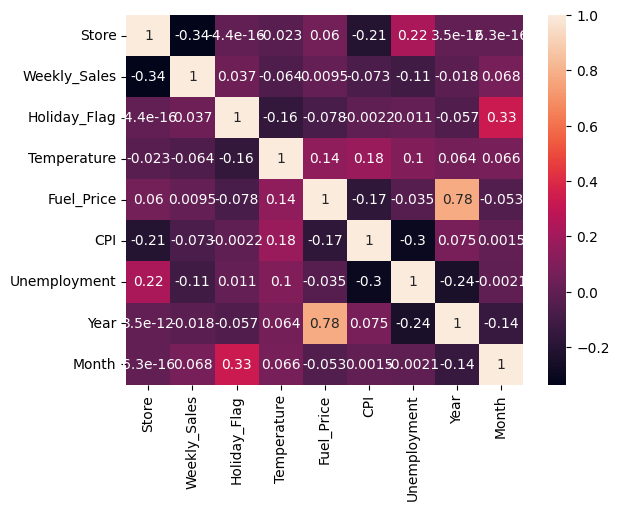

In [17]:
# Finding the correlation between weekly sales and all variables from the data.

sns.heatmap(df1.corr(),annot = True)
plt.show()

> **Understanding the correlation heat map:**

    * Applying Pearson correlation to measure the strength of the linear relationship between two variables. 
    * The relation ship of a variable with itself is always going to be 1, hence the diagonal is 1.
    * If the value is 0, there is no correlation.
       1. (See Weekly_Sales and Fuel_Price)
    * If the value is between 0 to 1, then there is positive linear correlation. That means change in one variable causes the other variable to move in same direction. 
    * If the value is between 0 to -1, then there is a negative linear correlation. That means change in one variable causes the other variable to move in other direction. 
        1. (See Holiday_Flag and Store)
    
    
***Something note worthy is there is strong positive relation ship between Fuel_Price and Year. 
Although none of the existing variables have a strong positive correlation with weekly_Sales.***

# MODEL 1: REGRESSION MODEL TO PREDICT SALES 

#Notes: 
1. Split the data in test data and train data. make prediction on test data
2. Access the model performance. 
3. Understand which variables influence the weekly_sales?
4. Plot the actual sales vs predicted sales?
5. If needed, Repeat the model with removing variables to increase model performance. 
6. Try other forecasting models, if needed. 

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Year          6435 non-null   int64  
 9   Month         6435 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 502.9+ KB


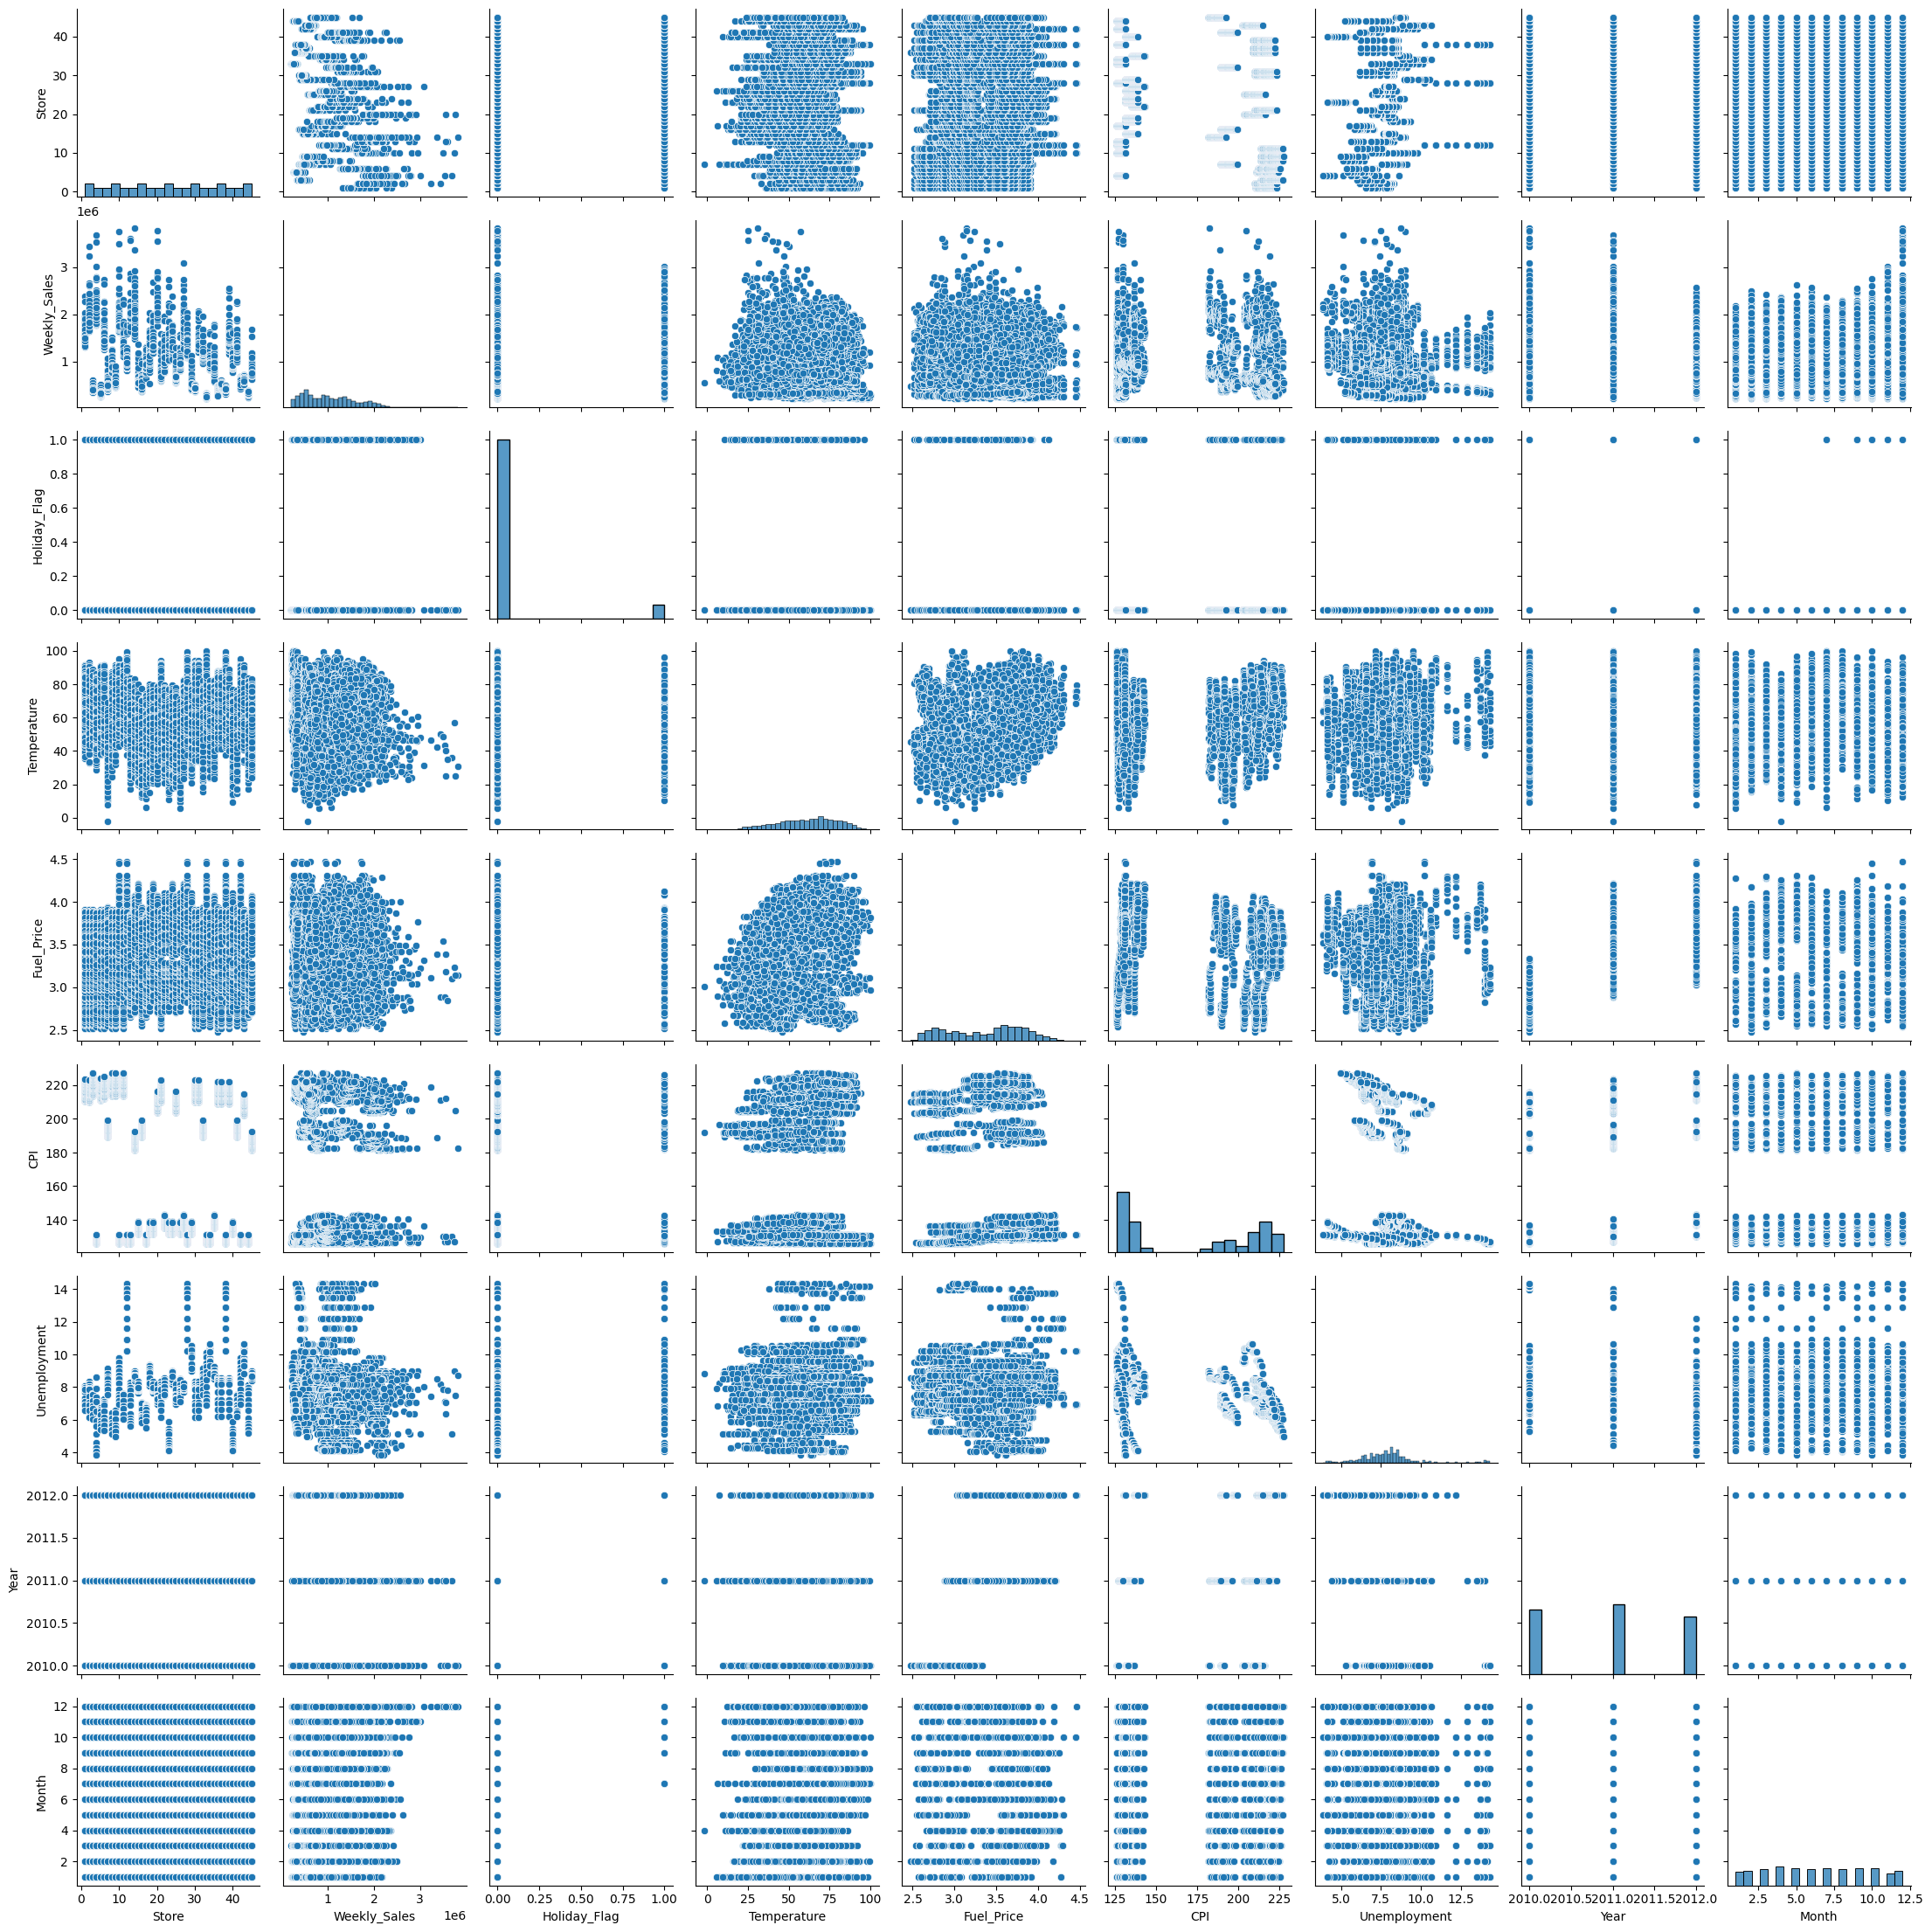

In [19]:
# Plot to all variables to understand the relationship with each other

sns.pairplot(df1)

As you can see from the above graphs there are no relationships between variables where one increase/decrease causes a increase/decrease in other. 

In [20]:
#Define features for your model

features_X = df1[['Year', 'Month', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df1.Weekly_Sales

#Dividing our data in train and test(That means out of 6435, 20% of the datapoints will be used training)

x_train, x_test, y_train, y_test = train_test_split(features_X,y, test_size = 0.2)

#creating a model of linear regression
model = LinearRegression()

In [21]:
#Train the data on our training data
model.fit(x_train, y_train)

LinearRegression()

In [22]:
#Predictions
#y_pred are the predicted values based on the features(features_X). Compare with actual values 

y_pred = model.predict(x_test)

In [23]:
#Print the coefficients of the model

pd.DataFrame(model.coef_, features_X.columns, columns = ['Coeff_'])

,Coeff_
Year,-60930.988645
Month,9507.936857
Temperature,-1433.246703
Fuel_Price,75066.087934
CPI,-1384.131804
Unemployment,-46958.290091


Positive Coefficients indicates that as Fuel_price increase, weekly_sales also tend to increase
Negative coefficents indicates tht as CPI increases, Weekly_sales decrease. 

In [24]:
#Model Performance metrics

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# variance of sales explained by indepedent variables(features_X). How well the model fits the data. Higher is better. 
r2 = r2_score(y_test, y_pred)

#MSE: Average Squared distance between predicted and actual values. Lower is better.
mse = mean_squared_error(y_test, y_pred)

#MAE: Absolute average distance between predicted and actual values. Lower is better. 
mae = mean_absolute_error(y_test, y_pred)


print("R2 Score:", r2)
print("Mean squared error:",mse)
print("Mean absolute error", mae)


#Value of salary when the independent variables(Features_X)
#If positive, sales increase as features_X increase. If negative, opposite.
print(f"intercept: {model.intercept_}")

R2 Score: 0.020868147338026888
Mean squared error: 313155468505.4476
Mean absolute error 468472.8662236923
intercept: 123960196.73075907


Text(0, 0.5, 'Predicted Values')

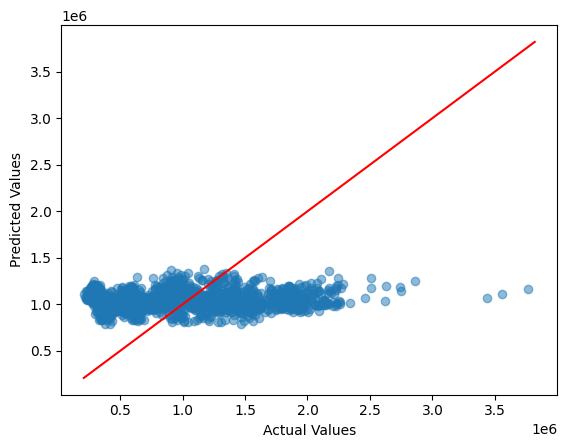

In [25]:
#Plotting predicted vs Actual Values
# x-axis = y_predict; y-axis = y_test
#If the model is a good fit, the points should be close to diagonal line,
#indicating a strong linear relationship between actual and predicted.

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()], color = "red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Residuals')

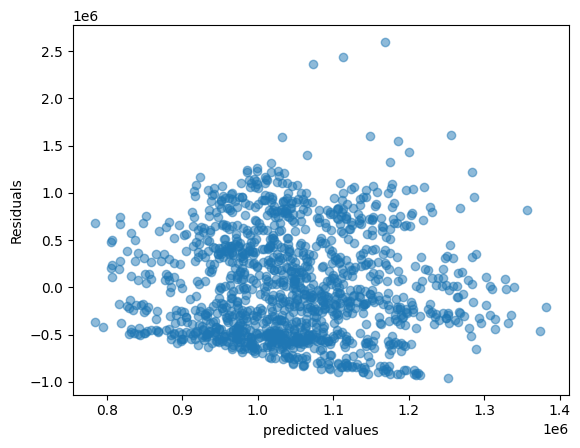

In [26]:
#Plot the residuals
#The residuals are plotted against the predicted values(y_pred) of target variable
#if the linear regression model is a good fit for the data,
#residual plot should show a random scatter of the points around zero with no trend

plt.scatter(y_pred, y_test - y_pred, alpha = 0.5)
plt.xlabel("predicted values")
plt.ylabel("Residuals")